In [1]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from scripts import project_functions

df = project_functions.import_and_clean()
project_functions.eda(df)

Rows, Columns
 (827, 15)

First Five rows
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9 

**Observations**

*1:* The average temperature in this Italian city was 15.6°C. During all the time when data was being recorded, it never dropped below freezing and the highest temperature recorded was 30°C

*2:* Despite several of the PT08 columns being aesthetically similar, they each refer to much different things. These are Tin Oxide (PT08.S1), Titania (PT08.S2), Tungsten Oxide (PT08.S3(NOx) and PT08.S4(NO2)) and Indium Oxide (PT08.S5(O3)). These variables aren't measured in the same way that CO(GT), NMHC(GT), C6H6(GT), etc are measured but rather by an averaged sensor response. The parentheses at the end of PT08 likely refer to its related measured variable (Measured in micromg/m^3 or mg/m^3) If you use the two of them in conjunction, you would likely be able to find out how much of a particular type of PT08 is present.

*3:* Errors are represented in the dataset as -200. After eliminating these, there remain only 857 rows. A decrease of 91% from the original set (9358 entries). 

<AxesSubplot:xlabel='Date'>

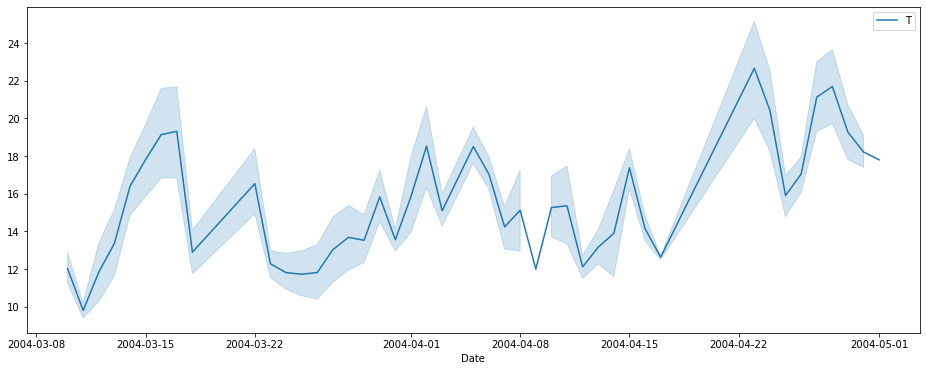

In [6]:
plt.figure(figsize=(16, 6))
plot1 = sns.lineplot(data=df[["Date","T"]].set_index('Date'))
plot1
#This is a plot of the temperature over time. While the endpoint is noticeably higher than the startpoint, this can
#be attributed to a change in seasons (i.e. spring to summer) or a sudden warming. The data with removed rows only covers 
#44 days.

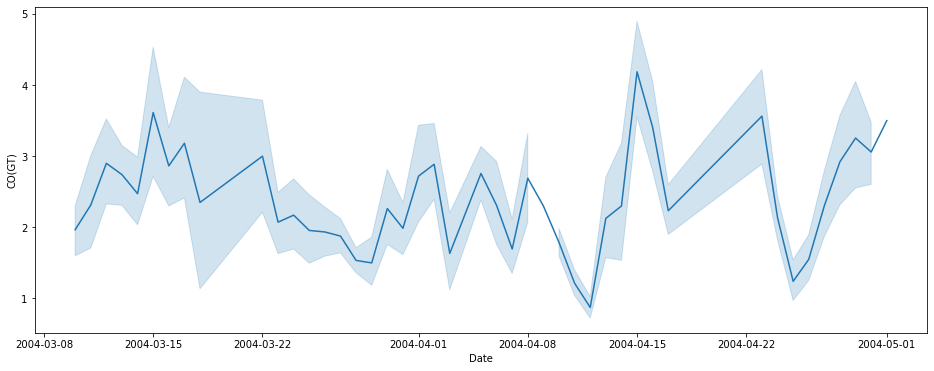

In [8]:
plt.figure(figsize=(16, 6))
plot2 = sns.lineplot(data=df, x="Date", y="CO(GT)")
#Carbon monoxide over time. 

<AxesSubplot:>

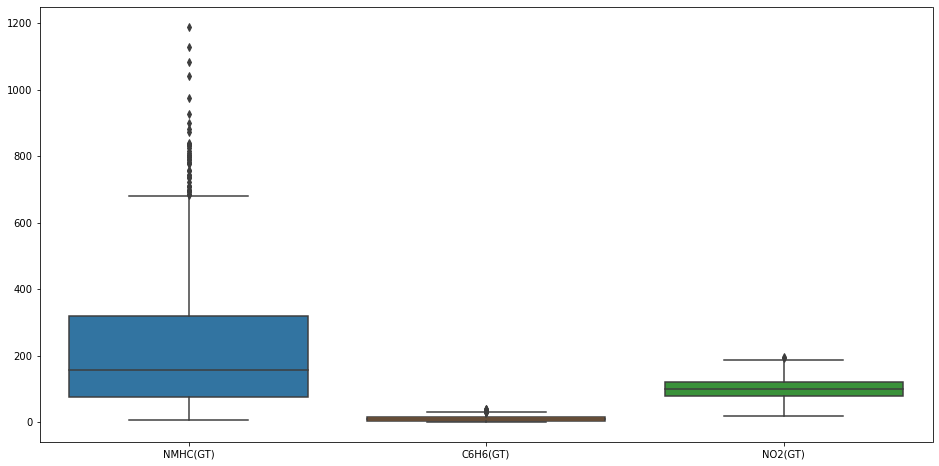

In [10]:
plt.figure(figsize=(16, 8))
df2 = df[["NMHC(GT)","C6H6(GT)","NO2(GT)"]]
sns.boxplot(data=df2)
#Determine which type of pollution is most significant from Non Metanic HydroCarbons, Benzene and Nitrogen Dioxide
#Of course, NHMCs are the most prevalent, given that they are comprised by numerous hydrocarbons. 
#Some examples include propane and ethane. Gasoline is also a mixture of many hydrocarbons.


**With these graphs and the basic information from the EDA, we can now create some questions that we can try to answer with the data.**

# Research Questions #

**1.** Is the average pollution of this Italian City increasing over time or is it relatively constant?

**2.** Does Temperature have an impact on the amount of pollution in the air? Does humidity? 


# Reseach Question 1 #

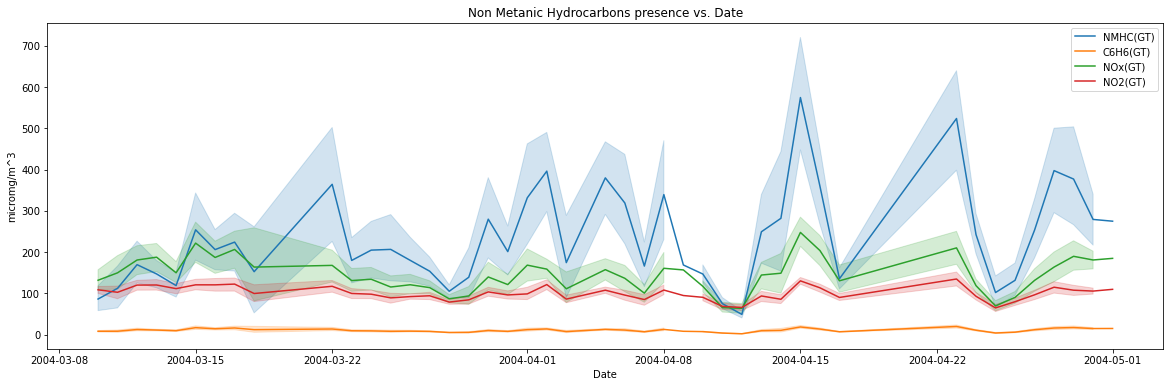

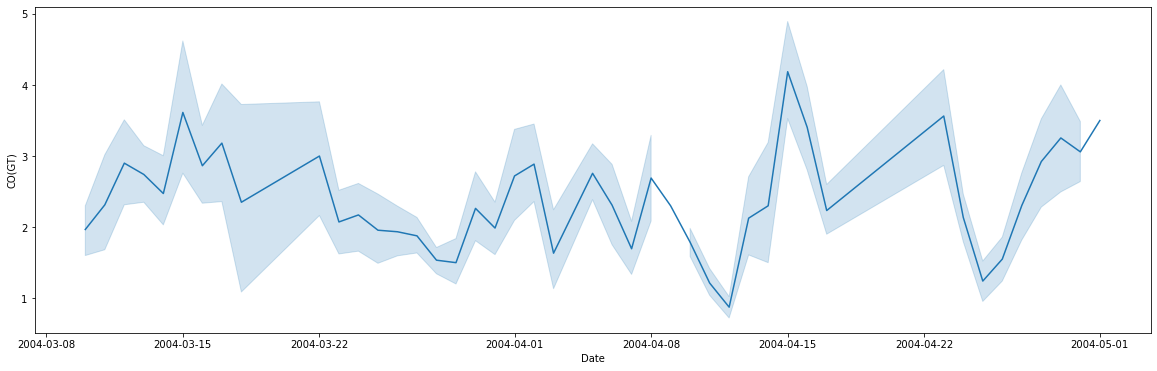

In [32]:
#The simplest way to answer this question is to graph the change of pollutants over time. 
#We already have the graph of Carbon Monoxide over time, so we just need the graphs of the other pollutants 
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df, x="Date", y="NMHC(GT)", label='NMHC(GT)')
sns.lineplot(data=df, x="Date", y="C6H6(GT)", label='C6H6(GT)')
sns.lineplot(data=df, x="Date", y="NOx(GT)", label='NOx(GT)')
sns.lineplot(data=df, x="Date", y="NO2(GT)", label='NO2(GT)')
ax.set_title('Non Metanic Hydrocarbons presence vs. Date')
ax.set_ylabel('micromg/m^3')

#Now look at the graphs of the pollutants as well as the original Carbon Monoxide graph.
plt.figure(figsize=(20, 6))
plot2 = sns.lineplot(data=df, x="Date", y="CO(GT)")

**Observation and Discussion:**

If we compare start and end points for each of these lines, we can see in some cases that there is a definite upward trend. (Specifically Carbon Monoxide, NMHC(GT) and NOx(GT) have a noticeable upward trend, the other two have either a very slight upward or no specific trend)

What does this all mean? We can with certainty say that the pollution is increasing but this may only be a temporary thing. This dataset only holds data for a month From March 3rd to June 1st and it is illogical to apply this observation when it has such a small amount of data. It is possible that this increased pollution is simply a result that more people are out and about or tourist season is starting. There are many possible explanations for this. 

We can also overlay Temperature onto these graphs to try singling out a cause.

Text(0.5, 1.0, 'CO Vs. Time')

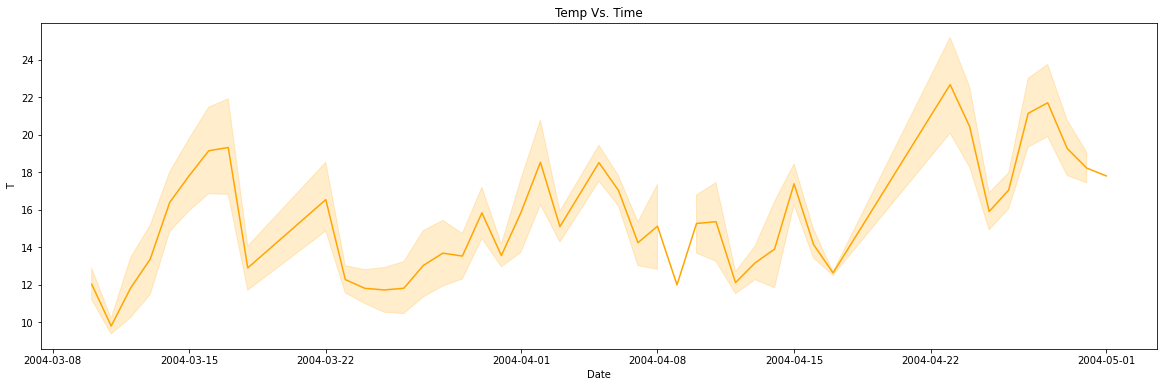

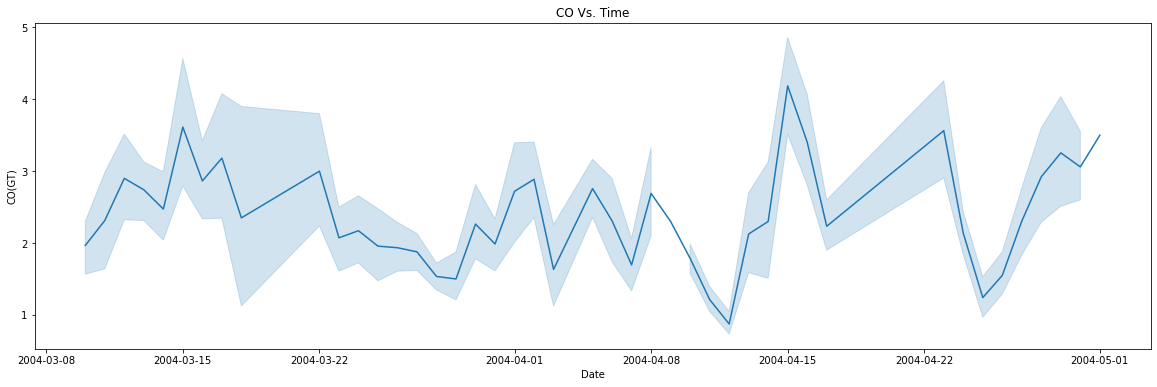

In [51]:
plt.figure(figsize=(20, 6))
tempplot = sns.lineplot(data=df, x="Date", y="T", color='orange')
tempplot.set_title('Temp Vs. Time')

plt.figure(figsize=(20, 6))
coplot = sns.lineplot(data=df, x="Date", y="CO(GT)")
coplot.set_title('CO Vs. Time')

Surprisingly, the Temperature and the Carbon Monoxide graphs are really similar. This can be explained in a few ways.
When the Temperature is hot, the Carbon Monoxide levels tend to rise as well, which could indicate that more people are active. To investigate this, we can compare the hydrocarbon levels to the temperature and see the results.

Text(0.5, 1.0, 'NMHC Vs. Time')

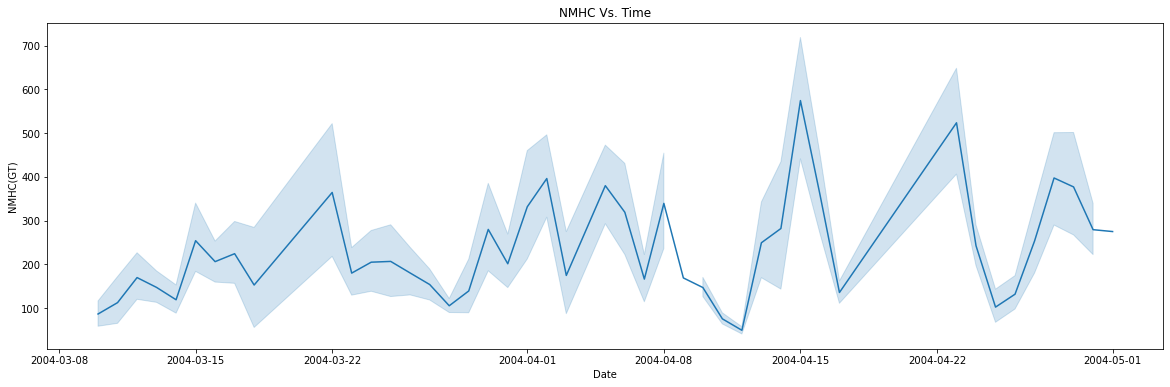

In [50]:
plt.figure(figsize=(20, 6))
coplot = sns.lineplot(data=df, x="Date", y="NMHC(GT)")
coplot.set_title('NMHC Vs. Time')

This graph also seems to mimic the temperature and Carbon Monoxide graphs. Similar to the Carbon Monoxide graph, this one tends to spike when temperature spikes. We can make an assumption that on hotter days, the hydrocarbon emissions are higher. (Though we cannot assume it is like this all the time since the dataset is so small).

In conclusion, can we say for certain that the emissions from this Italian city are increasing? No, this is due to our dataset being too small. However we are able to confirm that over the month that this dataset covers, the emissions do have an upward trend. 

# Research Question 2 #

We covered some of this question as part of Research Question 1. We noted that as the temperature increased, then the hydrocarbon and carbon monoxide emissions tended to follow. 

But what about humidity? Does that play a role? We can find out by comparing the humidity to emission levels much like we did the temperature

Text(0.5, 1.0, 'CO Vs. Time')

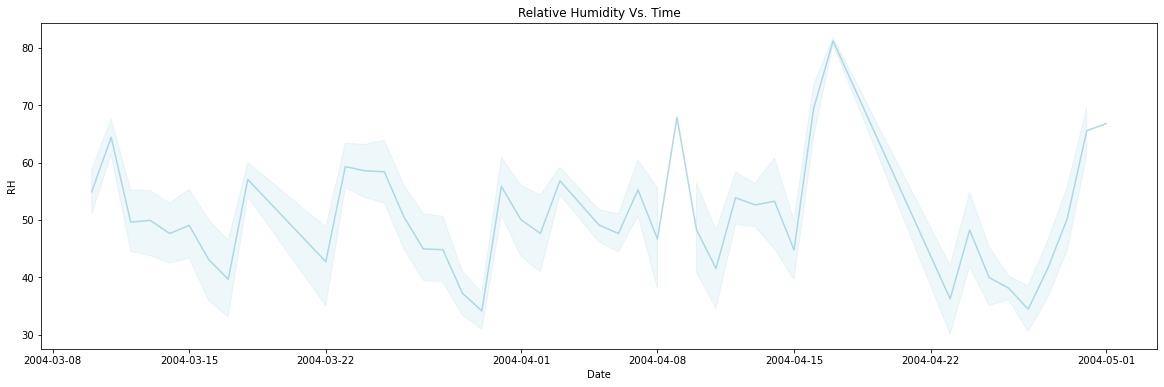

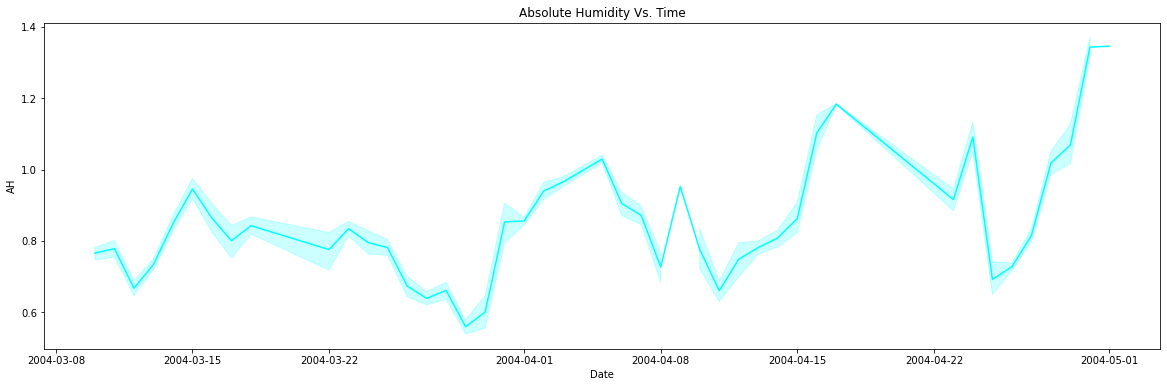

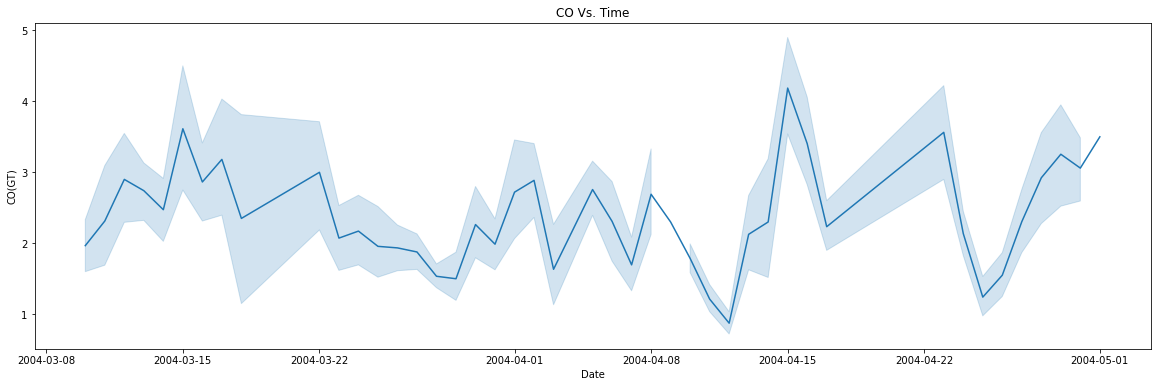

In [61]:
plt.figure(figsize=(20, 6))
rhplot = sns.lineplot(data=df, x="Date", y="RH",color="lightblue")
rhplot.set_title('Relative Humidity Vs. Time')
#Relative humidity is a percentage of the water content in air

plt.figure(figsize=(20, 6))
ahplot = sns.lineplot(data=df, x="Date", y="AH", color="cyan")
ahplot.set_title('Absolute Humidity Vs. Time')
#Absolute humidity is often expressed in either grams/m^3 or grams per kilogram. 
#The creator of this dataset does not specify which he uses.

plt.figure(figsize=(20, 6))
tempplot = sns.lineplot(data=df, x="Date", y="CO(GT)")
tempplot.set_title('CO Vs. Time')

Interestingly, even the humidity levels seem to be following a similar pattern to the Carbon Monoxide graph. From what we can tell, humidity seems to be higher on days where Carbon Monoxide concentration is also high. Of course, like in the previous question, this does not prove that humidity increases pollution levels in that Italian city since our dataset only covers a month but we can inference that they may be correlated. 

Since the hydrocarbon emission levels also follow similarly to the carbon monoxide levels and those levels are quite similar to the humidity levels, we can inference that, for our dataset, humidity may play a role in emission levels.